In [4]:
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Set up the paths to the input directories
train_dir = "C:/Users/Dell/University/Machine learning/FaceSplittednew/train"
test_dir =  "C:/Users/Dell/University/Machine learning/FaceSplittednew/test"

# Set up the image dimensions
img_height = 224
img_width = 224


# Define a function to preprocess the images
def preprocess_images(data_dir):
    X = []
    y = []
    
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                if file_name.endswith('.jpg'):
                    img_path = os.path.join(class_dir, file_name)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, (img_height, img_width))
                    X.append(img)
                    y.append(class_name)
                    
    X = np.array(X)
    y = np.array(y)
    
    # Normalize the data using mean and standard deviation and we applied the normalization before the oversamling to prevent data leakage
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(X.shape[0], -1))
    X = X.reshape(-1, img_height, img_width, 3)
    
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y)
    X_resampled = X_resampled.reshape(-1, img_height, img_width, 3)
    
   
    
    
    # Perform label encoding on the target variable (labels)
    label_encoder = LabelEncoder()
    y_resampled = label_encoder.fit_transform(y_resampled)
    
    return X_resampled, y_resampled
    




In [6]:
# Preprocess the training data
train_X, train_y = preprocess_images(train_dir)

# Preprocess the testing data
test_X, test_y = preprocess_images(test_dir)

In [7]:
print(np.unique(train_y))
print(np.unique(test_y))

[0 1]
[0 1]


In [ ]:
#print(label_encoder.classes_)
#train_X.reshape(1346, -1)
#test_X.reshape(506, -1)

In [8]:
# Flatten each image into a 1-dimensional array of features
train_X_flat = np.array([img.flatten() for img in train_X])
test_X_flat = np.array([img.flatten() for img in test_X])




In [9]:
test_X_flat.shape

(432, 150528)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.1, 1, 10, 100]}
# svm_model = SVC()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
# grid_search.fit(train_X_flat, train_y)

# # Get the best C value and corresponding performance
# best_c = grid_search.best_params_['C']
# best_score = grid_search.best_score_

# print("Best C:", best_c)
# print("Best score:", best_score)


In [ ]:
# # Define the range of degree values to evaluate
# param_grid = {'degree': [2, 3, 4, 5]}

# # Create an SVM model with the polynomial kernel
# svm_model = SVC(kernel='poly')

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
# grid_search.fit(train_X_flat,  train_y)

# # Get the best degree value and corresponding performance
# best_degree = grid_search.best_params_['degree']
# best_score = grid_search.best_score_

# print("Best degree:", best_degree)
# print("Best score:", best_score)

In [ ]:
param_grid = {'coef0': [0.0, 0.5, 1.0,2.0,3.0,4.0,5.0]}

# Create an SVM model with the polynomial kernel
svm_model = SVC(kernel='poly')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(train_X_flat,  train_y)

# Get the best coef0 value and corresponding performance
best_coef0 = grid_search.best_params_['coef0']
best_score = grid_search.best_score_

print("Best coef0:", best_coef0)
print("Best score:", best_score)

In [ ]:
gamma_values = [0.1, 0.01, 0.001]

# Create an SVM model with the RBF kernel
svm_model = SVC(kernel='rbf')

# Set up the parameter grid
param_grid = {'gamma': gamma_values}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(train_X_flat, train_y)

# Get the best gamma value and corresponding performance
best_gamma = grid_search.best_params_['gamma']
best_score = grid_search.best_score_



print("Best gamma:", best_gamma)
print("Best score:", best_score)


In [10]:
#SVM with poly and best degree and best c and best coef
svm_model= SVC(C=1, kernel='poly', degree=3, coef0=6, probability=True,random_state=42)

#svm with rbf with best c  and best gamma
#svm_model= SVC(C=1, kernel='rbf', gamma=0.1, probability=True,random_state=42)

#svm with sigmoid with best chosen c and best coef
#svm_model= SVC(C=1, kernel='sigmoid', degree=2, coef0=6, probability=True,random_state=42)


#svm with linear with best c
#svn_mode SVC(C=1,kernel='linear',random_state=42)
svm_model.fit(train_X_flat, train_y)

# Predict labels for the preprocessed testing data
pred_y = svm_model.predict(test_X_flat)

# Evaluate the performance of the classifier
acc = accuracy_score(test_y, pred_y)
rec = recall_score(test_y, pred_y)
prec = precision_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)

print("Accuracy: {:.3f}".format(acc))
print("Recall: {:.3f}".format(rec))
print("Precision: {:.3f}".format(prec))
print("F1_score: {:.3f}".format(f1))

Accuracy: 0.579
Recall: 0.574
Precision: 0.579
F1_score: 0.577


In [11]:
threshold = 0.5

y_pred_classes = np.where(pred_y >= threshold, 1, 0)

conf_mat = confusion_matrix(test_y, y_pred_classes)

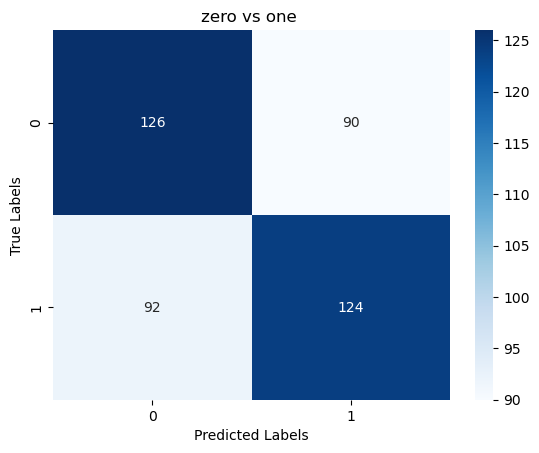

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(test_y, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("zero vs one ")

# Show the plot
plt.show()

In [13]:
auc_score = roc_auc_score(test_y, y_pred_classes)


print("AUC score: {:.2f}".format(auc_score))

AUC score: 0.58


In [14]:
print(len(test_y)) 
print(len(pred_y))

432
432


In [ ]:
from sklearn.datasets import load_iris
from joblib import dump

In [ ]:
dump(svm, 'svm_model.joblib')

In [ ]:
from joblib import load
loaded_svm_model = load('svm_model.joblib')


